In [6]:
#import the required libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import random

%matplotlib inline

In [11]:
#import the data
train_dataset = h5py.File('datasets/train_catvnoncat.h5', 'r')
test_dataset = h5py.File('datasets/test_catvnoncat.h5', 'r')

train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y_orig = np.array(train_dataset["train_set_y"][:])
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y_orig = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:])

train_set_y_orig = train_set_y_orig.reshape(1, train_set_y_orig.shape[0])
test_set_y_orig = test_set_y_orig.reshape(1, test_set_y_orig.shape[0])

[17 31 56]


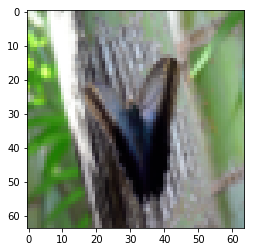

In [33]:
#test if data entered is correct
index = random.randint(0, train_set_x_orig.shape[0])
plt.imshow(train_set_x_orig[index])

In [39]:
#Preprocess the data

#flatten the array
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

#DataNormalization
train_set_x_flatten = train_set_x_flatten/255
test_set_x_flatten = test_set_x_flatten/255


(12288, 209)


In [35]:
#Initialize the parameters
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1), dtype=float)
    b = 0
    return w, b

In [50]:
#Forward Propogation Functions

def sigmoid(z):
    a = 1 / (1 + np.exp(-z))
    return a

def propagate(w, b, X, Y):
    m = X.shape[0]
    A = sigmoid(np.dot(w.T, X) + b)
    
    cost = (-1/m)*(np.dot(Y, np.log(A.T)) + np.dot((1 - Y), np.log((1 - A).T)))
    cost = np.squeeze(cost)
    
    dw = (1/m)*(np.dot(X, (A-Y).T))
    db = (1/m)*(np.sum(A-Y))
    
    grads = {
        "dw" : dw,
        "db" : db
    }
    
    return grads, cost

In [51]:
#Optimization Function

def optimize(w, b, X, Y, num_iterations, learning_rate):
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    params = {
        "w" : w,
        "b" : b
    }
    return params

In [52]:
#Predict Function
def predict(w, b, X):
    Y_prediction = sigmoid(np.dot(w.T, X) + b)
    for i in range(Y_prediction.shape[1]):
        if Y_prediction[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
    return Y_prediction

In [53]:
#Define Model
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    dim = X_train.shape[0]
    initial_w, initial_b = initialize_with_zeros(dim)
    final_params = optimize(initial_w, initial_b, X_train, Y_train, num_iterations, learning_rate)
    final_w = final_params["w"]
    final_b = final_params["b"]
    
    Y_predict_train = predict(final_w, final_b, X_train)
    Y_predict_test = predict(final_w, final_b, X_test)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))
    return final_params

    
final_params = model(train_set_x_flatten, train_set_y_orig, test_set_x_flatten, test_set_y_orig, num_iterations = 2000, learning_rate= 0.05)

train accuracy: 90.43062200956938 %
test accuracy: 66.0 %
